## **Logistic Regression For Imbalanced Dataset**

In [1]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification

In [2]:
## Imbalanced dataset
X,y=make_classification(n_samples=10000,n_features=2,n_clusters_per_class=1,n_redundant=0,weights=[0.99],random_state=10)

In [3]:
X

array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       ...,
       [ 0.99509904, -0.54192355],
       [ 1.75859359, -1.54961188],
       [ 0.79770543, -1.99467372]])

In [4]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [5]:
Counter(y)

Counter({0: 9846, 1: 154})

In [6]:
import pandas as pd

<Axes: xlabel='0', ylabel='1'>

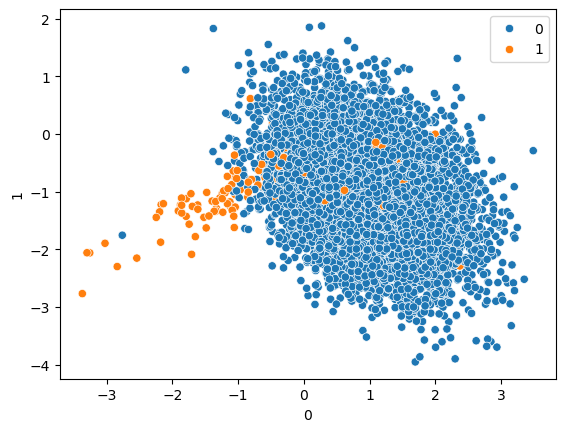

In [7]:
import seaborn as sns
import pandas as pd

# Assuming X is a 2D array or DataFrame and y is a series or array
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
penalty = ['l1','l2','elasticnet']
c_value = [100,10,1.0,0.1,0.01]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
class_weight=[{0:w,1:y,} for w in [1,10,50,100] for y in [1,10,50,100]]

In [10]:
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [11]:
params=dict(penalty=penalty,C=c_value,solver=solver,class_weight=class_weight)

In [12]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [13]:
## GridSearchCV
from sklearn.model_selection import GridSearchCV , StratifiedKFold
cv = StratifiedKFold()
grid = GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv = cv)

In [14]:
grid.fit(X_train,y_train)

c:\Users\md199\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\md199\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\md199\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\md199\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\md199\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\md199\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [15]:
grid.best_params_

{'C': 0.01,
 'class_weight': {0: 10, 1: 50},
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [16]:
y_pred=grid.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [18]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.992
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2486
           1       0.40      0.86      0.55        14

    accuracy                           0.99      2500
   macro avg       0.70      0.92      0.77      2500
weighted avg       1.00      0.99      0.99      2500

[[2468   18]
 [   2   12]]


## **Logistic Regression With ROC curve And ROC AUC Score**

In [19]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  train_test_split
from sklearn.metrics import  roc_curve
from sklearn.metrics import  roc_auc_score
from matplotlib import pyplot

In [20]:
# generate 2 class dataset
X,y = make_classification(n_samples=1000,n_classes=2,random_state=1)

In [21]:
## split the dataset into train and test
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [22]:
X

array([[-2.04582165, -0.13791624, -0.08071423, ...,  2.48194524,
         0.74236675,  0.23154789],
       [-0.98726024,  1.30120189,  2.37734888, ...,  0.55445754,
        -0.21892143, -0.37608578],
       [ 0.57335921,  0.09375582,  0.4662521 , ..., -0.6088508 ,
         0.79903499, -0.17121177],
       ...,
       [-0.70737159,  1.07650943,  0.58510456, ..., -1.51337602,
         0.90239871, -0.69230951],
       [-0.20706849,  1.17319848, -1.94478665, ..., -0.32820676,
         1.5711921 ,  1.14877729],
       [-2.16769231, -2.54871672,  2.89359255, ...,  0.71535366,
         0.34329241,  1.07350284]])

In [23]:
# Created a dummy model with default 0 as output
dummy_model_prob=[0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [24]:
y

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [25]:
## Lets Create Basic Logistic Model
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [26]:
model_prob=model.predict_proba(X_test)
model_prob

array([[9.58775327e-04, 9.99041225e-01],
       [9.03113399e-01, 9.68866009e-02],
       [5.10627964e-01, 4.89372036e-01],
       [1.89953026e-01, 8.10046974e-01],
       [8.87573193e-01, 1.12426807e-01],
       [5.60127995e-01, 4.39872005e-01],
       [1.70539186e-01, 8.29460814e-01],
       [2.86177560e-01, 7.13822440e-01],
       [1.12292117e-01, 8.87707883e-01],
       [1.32026145e-01, 8.67973855e-01],
       [9.99456145e-01, 5.43854787e-04],
       [1.68799639e-01, 8.31200361e-01],
       [8.08969781e-01, 1.91030219e-01],
       [4.60946921e-01, 5.39053079e-01],
       [2.71939746e-01, 7.28060254e-01],
       [1.76492952e-01, 8.23507048e-01],
       [6.14129577e-02, 9.38587042e-01],
       [3.61632696e-01, 6.38367304e-01],
       [8.89840189e-01, 1.10159811e-01],
       [7.58965653e-01, 2.41034347e-01],
       [9.88414268e-01, 1.15857322e-02],
       [5.09845298e-01, 4.90154702e-01],
       [1.11914893e-01, 8.88085107e-01],
       [2.05189797e-03, 9.97948102e-01],
       [8.630545

In [27]:
model_prob=model_prob[:,1]

In [28]:
## Lets calculate the scores
dummy_model_auc=roc_auc_score(y_test,dummy_model_prob)
model_auc=roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9108885464817668


In [29]:
## calculate ROC Curves
dummy_fpr,dummy_tpr, _ = roc_curve(y_test,dummy_model_prob)
model_fpr,model_tpr, _ = roc_curve(y_test,model_prob)

In [30]:
## calculate ROC Curves
dummy_fpr,dummy_tpr, _ = roc_curve(y_test,dummy_model_prob)
model_fpr,model_tpr, thresholds = roc_curve(y_test,model_prob)

In [31]:
thresholds

array([           inf, 9.99738397e-01, 9.87033757e-01, 9.86362468e-01,
       9.57744551e-01, 9.57101721e-01, 9.45385188e-01, 9.40463485e-01,
       9.28300276e-01, 9.27356342e-01, 9.25607881e-01, 9.23728474e-01,
       8.94744248e-01, 8.94036983e-01, 8.43395917e-01, 8.38396411e-01,
       8.28791784e-01, 8.26684852e-01, 8.08489957e-01, 8.06352720e-01,
       7.80393330e-01, 7.63976766e-01, 7.63705186e-01, 7.63537905e-01,
       7.58496683e-01, 7.55347574e-01, 7.52623720e-01, 7.48020931e-01,
       7.23488083e-01, 7.23238629e-01, 6.74619385e-01, 6.56791269e-01,
       6.55162225e-01, 6.26882105e-01, 5.99962989e-01, 5.57931518e-01,
       5.39053079e-01, 5.14219160e-01, 5.05342549e-01, 4.96278090e-01,
       4.90154702e-01, 4.85201910e-01, 4.69275954e-01, 4.50983178e-01,
       4.46563018e-01, 4.39872005e-01, 4.24245353e-01, 3.24715881e-01,
       3.12906913e-01, 3.06694053e-01, 3.01325247e-01, 2.10358834e-01,
       2.06296724e-01, 1.91030219e-01, 1.69877066e-01, 1.42771985e-01,
      

In [32]:
model_fpr

array([0.        , 0.        , 0.        , 0.00757576, 0.00757576,
       0.01515152, 0.01515152, 0.02272727, 0.02272727, 0.03030303,
       0.03030303, 0.03787879, 0.03787879, 0.04545455, 0.04545455,
       0.0530303 , 0.0530303 , 0.06060606, 0.06060606, 0.06818182,
       0.06818182, 0.08333333, 0.08333333, 0.09090909, 0.09090909,
       0.09848485, 0.09848485, 0.11363636, 0.11363636, 0.12121212,
       0.12121212, 0.12878788, 0.12878788, 0.15909091, 0.15909091,
       0.18181818, 0.18181818, 0.18939394, 0.18939394, 0.20454545,
       0.20454545, 0.21969697, 0.21969697, 0.22727273, 0.22727273,
       0.24242424, 0.24242424, 0.31060606, 0.31060606, 0.32575758,
       0.32575758, 0.38636364, 0.38636364, 0.40909091, 0.40909091,
       0.41666667, 0.41666667, 0.53030303, 0.53030303, 0.53787879,
       0.53787879, 1.        ])

In [33]:
model_tpr

array([0.        , 0.00847458, 0.1440678 , 0.1440678 , 0.23728814,
       0.23728814, 0.28813559, 0.28813559, 0.36440678, 0.36440678,
       0.37288136, 0.37288136, 0.43220339, 0.43220339, 0.55084746,
       0.55084746, 0.60169492, 0.60169492, 0.6440678 , 0.6440678 ,
       0.6779661 , 0.6779661 , 0.68644068, 0.68644068, 0.69491525,
       0.69491525, 0.70338983, 0.70338983, 0.74576271, 0.74576271,
       0.79661017, 0.79661017, 0.81355932, 0.81355932, 0.83050847,
       0.83050847, 0.84745763, 0.84745763, 0.86440678, 0.86440678,
       0.88135593, 0.88135593, 0.88983051, 0.88983051, 0.89830508,
       0.89830508, 0.92372881, 0.92372881, 0.93220339, 0.93220339,
       0.94067797, 0.94067797, 0.95762712, 0.95762712, 0.96610169,
       0.96610169, 0.97457627, 0.97457627, 0.98305085, 0.98305085,
       1.        , 1.        ])

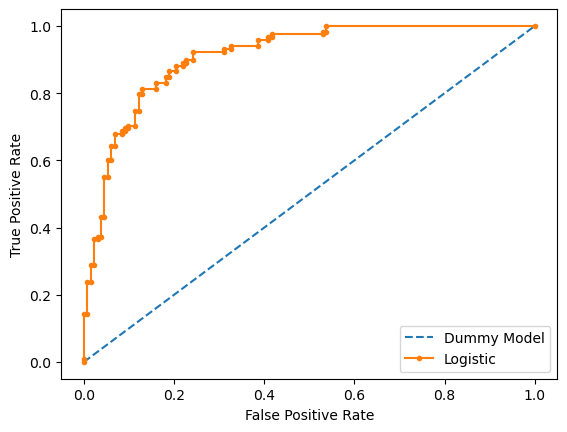

In [34]:
# plot the roc curve for the model
pyplot.plot(dummy_fpr,dummy_tpr,linestyle='--',label='Dummy Model')
pyplot.plot(model_fpr,model_tpr,marker='.',label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# Show the legend
pyplot.legend()
# show the plot
pyplot.show()

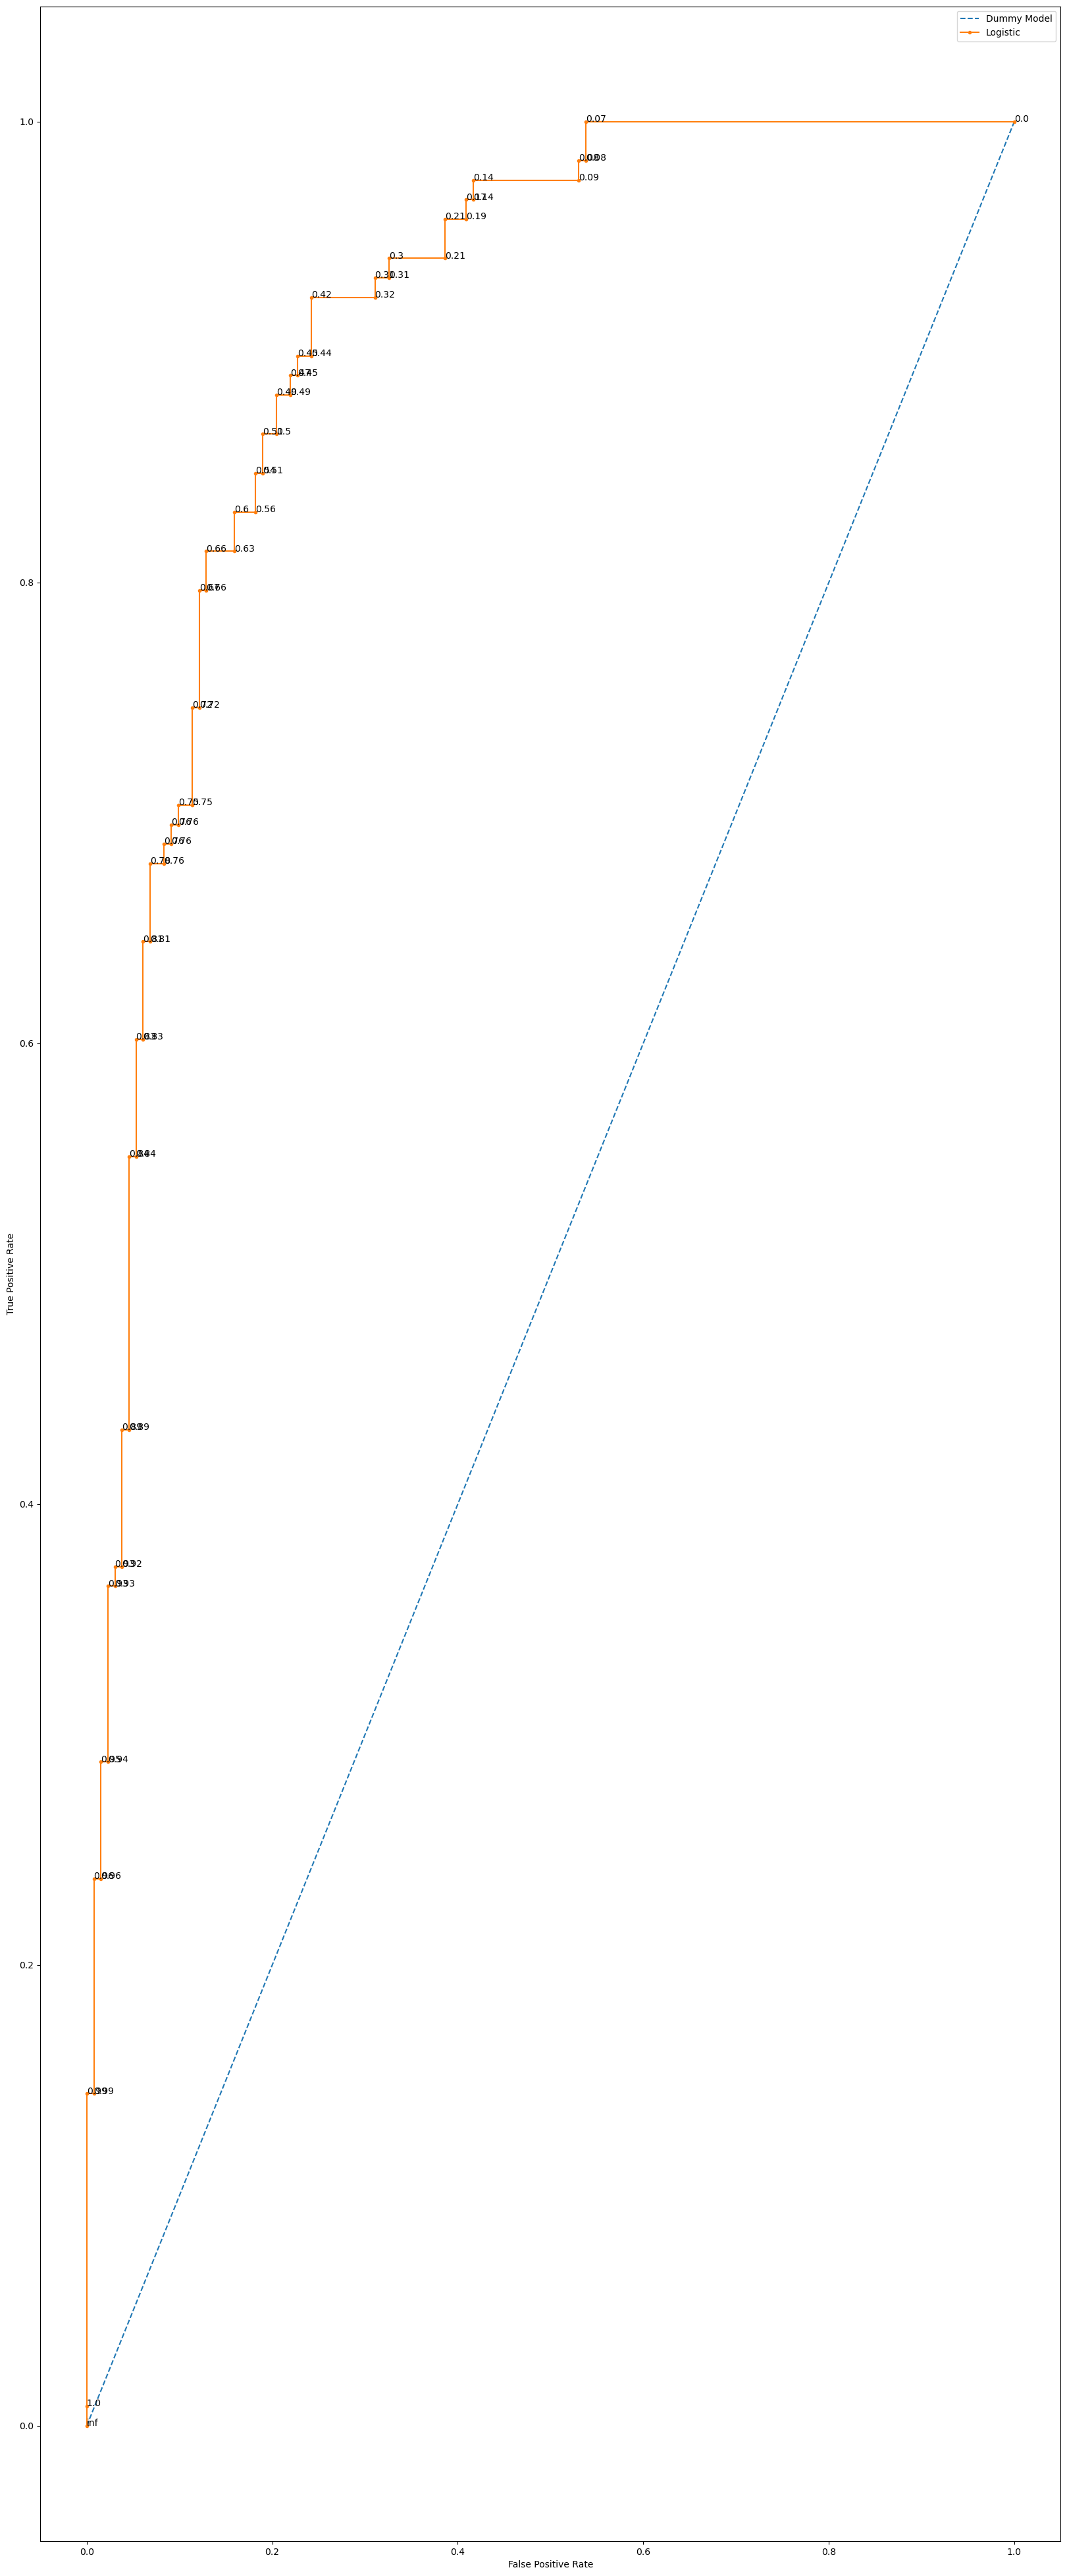

In [39]:
import numpy as np
from matplotlib import pyplot

fig = pyplot.figure(figsize=(20, 50))
ax = fig.add_subplot(111)

# Plot the ROC curves on the subplot
ax.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
ax.plot(model_fpr, model_tpr, marker='.', label='Logistic')

# Annotate the thresholds
for xyz in zip(model_fpr, model_tpr, thresholds):
    ax.annotate('%s' % np.round(xyz[2], 2), xy=(xyz[0], xyz[1]))

# Axis labels
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

# Show the legend
ax.legend()

# Show the plot
pyplot.show()
